# Introduction

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F01_introduction.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Basics in linear algebra and calculus
- Basics in python

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Definitions: bias, variance, irreducible error, underfitting, overfitting
- Introduction to probabilistic machine learning

</div>

## The IPCC report

<img alt="AR6" src="images/ar6_cover.jpeg" width=200 style="float:center">


The working group 1 (WG1) of the Intergovernmental Panel on Climate Change (IPCC) is a group of scientists who assess and quantify climate change. In order to provide an accurate description of the future climate, they use numerical models also known as Climate Model Intercomparison Project (CMIP).

- There are many components in a climate model: the main two parts are the oceanic model and the atmospheric model. Both models predict the evolution of state variable (temperature, velocity, CO2, etc.) on predefined grid points. In order to get an accurate prediction of the CO2 concentration, we also need to have a specific model to capture the dynamics of living ecosystems and biogeochemical cycles. In polar regions there are specific models for ice sheets and sea ice.

- There are several scenarios (Shared Socioeconomic Pathways) ranging from very optimistic (SS1: sustainability) to (very) pessimistic (SS5: Fossil fuel development)

- In CMIP6, there are over 100 full blown models that attempt to propose the most reliable forecast for each of these scenarios [Balaji et. al (2018)](https://gmd.copernicus.org/articles/11/3659/2018/gmd-11-3659-2018.pdf)

Dealing with all model outputs is not a sinecure. To write the IPCC report , thousands of scientists collaborated to share their data, produce consistent diagnostics and plot an overview of what all these models are telling us. The main point of this model intercomparison is to **reduce the uncertainty** of the prediction of the future climate. It is indeed very important to know:
- how much of global warming has human origins (understand the climate system)
- if tipping points will be crossed in 2030 or 2050 in order to best anticipate the changes (do predictions).


<img alt="warming" src="images/warming_origin.png" width=800 style="float:center">

Figure SPM2 ([IPCC repport](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM.pdf))

The figure above is a summary of the causes of the 1 degree temperature change since the industrial revolution. In this problem, there is one **output variable** (global temperature) and many **input variables** (CO2, methane, etc...). We sometimes call the input variable the independent variables and the output variable the dependent variable as the latter is function of the input variables.

The problem highlighted in the figure corresponds to a typical machine learning problem where we want to find a function that maps the input variables onto the output variables.

## First problem: variation of temperature with altitude

Before we solve the climate problem, let us start with a simpler question. You may have noticed that as you climb a mountain temperature gets cooler: you may even reach heights where there is permanent snow and ice. In order to get more insight on the vertical temperature profile in the atmosphere, meteorologist have used radio sounding. A adio sounding consists in launching a [buoyant balloon](https://en.wikipedia.org/wiki/Weather_balloon) filled with hydrogen or helium to which we attach a weather station. The buoyancy force drives the balloon upward and the instruments attached at the base of the balloon record variables of interest such as pressure, temperature, humidity, altitude, etc.  Below is a short clip of the launch of a sounding at the [strateole](https://strateole2.aeris-data.fr/) campaign at the *Laboratoire de Meteorologie Dynamique*. Let's use the [data](https://donneespubliques.meteofrance.fr/?fond=produit&id_produit=97&id_rubrique=33) of these soundings to see if we can extract a general law for the variation of temperature with height.


<img alt="warming" src="images/Premier-radiosondage_reference.gif" width=200 style="float:center">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Temperature (K)')

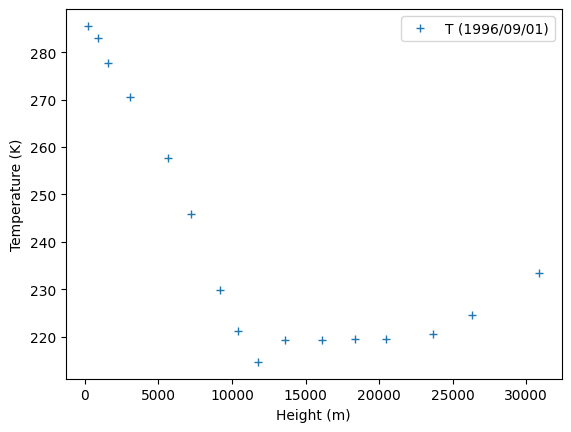

In [2]:
df_960901 = pd.read_csv('data/soundings/07145.19960901000000.csv', na_values='mq',skiprows=2)
ax = df_960901.plot('geop','t',style='+',label="T (1996/09/01)")
ax.set_xlabel('Height (m)')
ax.set_ylabel('Temperature (K)')

The temperature decreases from the surface to roughly 10 km. Above that altitude, the temperature increases slightly. The atmospheric layer from the ground to 10 km corresponds to the [troposphere](https://en.wikipedia.org/wiki/Troposphere). In this layer, we would like to propose a physical law for the variation of temperature with altitude. As a first guess, we suppose that there exist a linear relationship between the temperature and the altitude

\begin{equation}
y = \alpha x + \beta\, ,
\end{equation}
with $y$ the temperature and $x$ the altitude. $\alpha$ is called the **regression coefficient** and $\beta$ is called the **intercept**. In the next chapter, we are going to study linear regression and see how we can find $\alpha$ and $\beta$.

Although linear regression seems extremely simple, it is still regarded as the model of **maximum interpretability**. In fact, the sign and the magnitude of $\alpha$ tell you how $y$ varies with $x$ in an unambiguous way and you can easily confront this result to your physical intuition. In our case, $\alpha$ will tell us how many degrees we loose per meter traveled upward.

Later on, we will study neural networks with millions of parameters which may give a better prediction for $y$ than the linear regression. However, if neural networks give better predictions, their prediction is sometimes hard to interpret. Needless to say that it is important to try **simple methods first** before going to more complicated algorithms... Even if simple models are sometimes [too simple](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

In [3]:
# prepare dataset: limit height to h_max and drop missing values
h_max = 13000
X = df_960901['geop'][df_960901['geop'] < h_max].dropna().values
y = df_960901['t'][df_960901['geop'] < h_max].dropna().values

# create feature matrix
A = np.vstack([X, np.ones(len(X))]).T
#linear regression with numpy
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

According to the linear fit, the temperature gradient is -6.3 degreeC/km


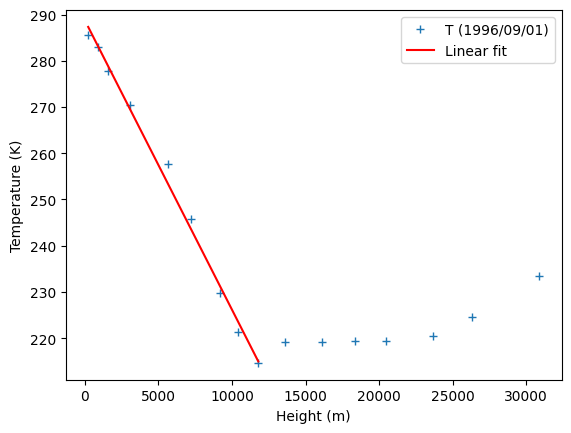

In [4]:
# plot original dataset and linear fit
ax = df_960901.plot('geop','t',style='+',label="T (1996/09/01)")
ax.plot(X, m*X + c, 'r', label='Linear fit')
ax.set_xlabel('Height (m)')
ax.set_ylabel('Temperature (K)')
plt.legend()
print(f"According to the linear fit, the temperature gradient is {1000*m:.1f} degreeC/km")


According to the linear fit, the temperature gradient is -6 degree/km. There is actually a physical justification to explain the variations of temperature with height. With thermodynamical arguments, we can show that the variation should be on the order of 5 degree/km. It is called the (moist) [adiabatic lapse rate](https://en.wikipedia.org/wiki/Lapse_rate).


> ***Questions***
> - How robust is this fit?
> - Would we get the same fit if we were to launch another balloon right after this one? 3 hours later? 3 days later? one year later? 

In the folder `data/soundings` we provide 2 more soundings for the dates 1996/09/03 and 1997/09/01. Don't hesitate to try to plot it to visualize the amplitude of the variability.

In machine learning problems, the task is to propose an estimate of the function that predicts the output variable based on the known input variables. This is based on our intuition that there *is* a relationship between the input and output variables in the form of

\begin{equation}
y = f (x) + \epsilon\, ,
\end{equation}
with $f$ the function that we will try to guess and $\epsilon$ is an **Irreducible error** that can have multiple origins.

> ***Questions***
> - Give several sources of errors for the problem we are considering
> - In this framework, $\epsilon$ is really an irreducible error. However, if you add more input variables, can you reduce the amplitude the irreducible error?

The above equation is the *ground truth*, however we usually don't know $f$. Our task is to propose an estimate of $f$ based on the sample observation that we have.  Because our observations are limited, we can only approximate $f$: we will denote this approximate function with a *hat* and write our prediction as

\begin{equation}
\hat y = \hat f(x)
\end{equation}

Note that this equation is **deterministic**: there is no random noise in the right hand side. In fact, because we want to provide the best estimate, there is no need to add noise in the prediction: that would necessarily give a worse prediction for $y$ (cf. next chapter)

We can then use $\hat f$ to
- make predictions
- understand the relationship between input and output variables

These two objectives are at the heart of machine learning techniques.

In the case of the linear regression, the function $f$ has two unknown parameters $\alpha$ and $\beta$. We call these functions **parametric functions** and the machine learning exercise consists in finding the best values for these parameters. There exists also functions $f$ that do not depend on any parameter (such as the spline fit). These functions are called **non-parametric** functions. 

## Statistic vs probabilities

**Probability**: Forward reasoning from known models to predict outcomes

- "Given current $CO_2$ trajectories, what's the probability of Greenland ice sheet collapse by 2050?"
- We have climate models -> calculate P(collapse|$CO_2$ scenario)

**Statistics**: Inverse reasoning from observed data to infer models

- "Given observed ice loss rates 1990-2020, what are the model parameters for future projections?"
- We have measurements -> we estimate the probability by looking at what happened

**Key difference**: Probability can be used to predict one-time future events; statistics learns from past data to build those predictive models.

## Probabilistic perspective

In the formalism that we have just discussed

\begin{equation}
y = f (x) + \epsilon\, ,
\end{equation}
the output variable $y$ is a **random variable**, and the input variable $x$ is an **observation** that is given without uncertainty. We can adopt a probabilistic approach to describe what the $f$ function could be. Suppose that $f$ is a parametric function with parameters $\alpha$ and $\beta$ (for the case of the linear regression). In order to use compact notation, let us gather all parameters in a vector $\mathbf{\theta}=(\alpha, \beta)$
Then a machine learning problem consist in finding the parameters $\mathbf{\theta}$ such that the probability

\begin{equation}
p(y|x, \mathbf{\theta})
\end{equation}
is maximum. Because we know $y$ and we vary $\mathbf{\theta}$, we call this quantity the likelihood of $\mathbf{\theta}$ given $y$, and our goal is to find the values of the parameters that maximize this likelihood.

In order to derive an analytical solution to this problem, we have to make assumptions about the noise $\epsilon$. In the most simplest case, we assume that $\epsilon$ is a Gaussian noise with zero mean and variance $\sigma^2$:

\begin{equation}
\epsilon \sim \mathcal N(0,\sigma^2)
\end{equation}
Hence
\begin{equation}
p(y|x,\mathbf{\theta})= \mathcal N(f(x),\sigma^2)
\end{equation}

In fact, we have $N$ observations $\mathcal D = \{(x_1,y_1), ... (x_N,y_N)\}$. Let us call $\mathcal X = \{ x_1, ... x_N\}$ the set of input variable and $\mathcal Y = \{ y_1, ... y_N\}$ the corresponding set of output variable.  Then, we want to maximize the likelihood

\begin{equation}
p(\mathcal Y|\mathcal X,\mathbf{\theta})
\end{equation}

We further assume that all observations are independent and identically distributed such that
\begin{equation}
p(\mathcal Y|\mathcal X,\mathbf{\theta}) = \prod_{n=1}^N p(y_i|x_i,\mathbf{\theta})
\end{equation}


Remember that we want to find the values of $\mathbf{\theta}$ that maximizes this likelihood. Because we have assumed Gaussian noise, it makes sense to find the maximum of the logarithm of $p(\mathcal Y|\mathcal X,\mathbf{\theta})$ (because the probability is a Gaussian distribution). Taking the log also transforms the product of all probabilities to a sum with is easier to handle for the minimization procedure.

With all these assumptions, we get a closed form solution for the values of parameters (see [Chap. 9.2 in Mathematics for Machine learning](https://mml-book.github.io/) for a detailed derivation). The value of $\mathbf{\theta}$ obtained with this method is called the **Maximum likelihood estimate (MLE)**. In the next chapter, We will find the solution for $\mathbf{\theta}$ with a non-probabilistic method.

## Types of errors

<div class="alert alert-block alert-info">
    
There are 3 types of errors: 
- Bias error
- Variance error
- Irreducible errors. 
    
We want to find model that have both the lowest bias and lowest variance. The irreducible error is intrinsic the dataset.
</div>

> ***Questions***
> 
> - How do we know that $\hat f$ is the correct fit? 
> - If we do a second field campain and take more measurements, will we get a new estimate for $\hat f$?
> - What if we use more precise instruments to do the measurements?


Suppose we now want a general law for the variation of temperature over the whole atmosphere - and not only the troposphere. Clearly, a linear fit will be a poor estimate.

> ***Question***
> 
> - Try to adjust `h_max` in the linear fit above to perform the linear regression over the whole atmosphere

In this case, the function $\hat f$ is not so good. In order to quantify how good, or how bad the model is, we need to introduce a metric. Example of such metric is the mean squared error

\begin{equation}
L = \mathbb{E}(y-\hat y)^2
\end{equation}

Hence, $\sqrt{L}$ is the typical error you do when you use the model $\hat f$ to make a prediction for $y$. Of course, we wish to have $L$ as small as possible. This type of metric is also called a **Loss function** or a **cost function** and a typical machine learning task is to minimize the loss function. It is sometimes possible to do it analytically for simple problems but most of the time we use numerical algorithms to find that minimum.


### Bias error

If the model we are trying to fit does not have enough degrees of freedom, there is a risk that we are ***underfitting*** the data, which is characterized by the ***Bias error***. We say a model is biased when it is not able to capture the correct relationship between features and target output. In the example above, we were trying to fit a linear relationship for the temperature over the whole atmosphere, but the relationship between the input and output variables was clearly not linear. The model is biased because there will always be an offset in the prediction of the output variable.


Formally, the bias error is defined as

\begin{equation}
Bias[\hat f(x)]=\mathbb E[\hat f(x)]−f(x)
\end{equation}

which corresponds to the systematic misfit between our prediction and the data.

### Variance error

An easy fix is to choose a different function $f$ and make it as complicated as we want so that this function goes through all our sample points. For our temperature profile, we have 15 points such that a polynomial of order 15 could work:

\begin{equation}
y = \alpha_1 x + \alpha_2 x^2 + ... + \alpha_{15} x^{15} + \beta\, .
\end{equation}

Remark: this type of function still falls in the linear regression category because it is *linear for the parameters* $\mathbf{\theta} = (\alpha_1, ... \alpha_{15}, \beta)$. The input features are now powers of $x$: $(x, x^2, ...,x^{15} )$, but all the formalism developed for 1D models can actually be written in vector form to handle the situation where the input variables are multivariate.

In [5]:
h_max = 30000
X = df_960901['geop'][df_960901['geop'] < h_max].dropna().values
y = df_960901['t'][df_960901['geop'] < h_max].dropna().values

# polynomial order
p_order = 15
p_coefs = np.polyfit(X, y, p_order)
p = np.poly1d(p_coefs)
xp = np.linspace(X.min(),X.max(),500)

C:\Users\dalpt\AppData\Local\Temp\ipykernel_20664\2880117583.py:7: RankWarning: Polyfit may be poorly conditioned
  p_coefs = np.polyfit(X, y, p_order)


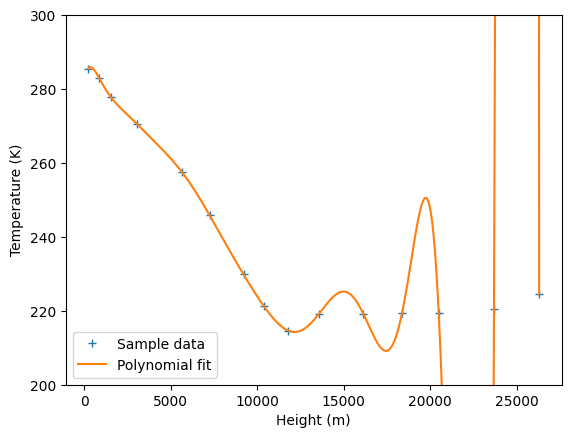

In [6]:
plt.plot(X,y,'+', label='Sample data')
plt.plot(xp,p(xp),'-', label='Polynomial fit')
plt.ylim([200,300])

plt.legend()
plt.xlabel('Height (m)')
plt.ylabel('Temperature (K)')
plt.legend()

Indeed, this model has the lowest possible loss function $L=0$. However, we identify at least three drawbacks:

- this function has poor predicting skills away from the sample points.
- any modification of the dataset might cause big modifications in $\hat f$.
- the physical interpretation is limited

One way to quantify the uncertainty on $\hat f$ is to divide the data set in a ***training data set*** and a ***testing data set***. We use the training data set to compute $\hat f$ and with the help of a metric, we can give a score to that $\hat f$ to compute how well it performs to reproduce the output variable. 

Then to validate the model, we compute the same score on the testing data set. If the score is the same than for the training data set, then the model is not specific to the training data set and can be generalized to more data. If the score is (significantly) higher, then that means the model is ***overfitting*** the data.

To measure how much the model is overfitting the data we introduce the ***Variance error*** which is a measure of the spread of all possible $\hat f$ function that one could get with all possible samples that are available. A model with high variance will change a lot from one dataset to another. Such model is overfitting the data.

 A *very* rough estimate of the variance error is thus given by

\begin{equation}
L_{test} - L_{train}
\end{equation}

with $L_{test}$ and $L_{train}$ are the Loss function computed on the testing and training dataset respectively. 

### Irreducible error

The last type of error we are going to deal with is the ***Irreducible error***. This error corresponds to the $\epsilon$ term in our model. You may see this error as the precision of your instrument or as missing physics in your model. This can be due to chaotic perturbation of your system. This type of error is not predictable.

<div class="alert alert-block alert-info">
    <b>Definitions</b>
    
- [**Supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs (labelled data set). The key aspect of supervised learning is that there exists a training data set with labelled data.
- on the other hand, [**Unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) corresponds to the problem of guessing patterns in an unlabelled data set

</div>

## References

- Chap. 9 in [Deisenroth, M.P., Faisal, A.A. and Ong, C.S., 2020. *Mathematics For Machine Learning*, Cambridge University Press.](https://mml-book.github.io/)
- [James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning* (Vol. 112, p. 18). New York: springer.](https://www.statlearning.com/)
- Chap 11 in [Murphy, K.P., (2022) *Probabilistic Machine Learning: An introduction*. MIT Press](https://probml.github.io/pml-book/book1.html)


***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>